In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../../")
from neurotools import ns5_tools
from neurotools.utils.trigger import trigger
from neurotools.emg_tools.emg_channel import eEMG
from scipy import signal

## Generate data if it doesn't exist

In [2]:
data_file = "./source/emg_single_channel.hdf5"
overwrite = False
if not (os.path.isfile(data_file)) or overwrite:
    ns5_path = "./source/UA014_SEL_AS_MS_BMG0_0007.ns5"
    ns5_file = ns5_tools.ns5Files(ns5_path)
    used_labels = ns5_file.get_analog_entitie_labels()[0:4]
    used_labels += ['Tr0 ', 'Tr1 ']
    ns5_file.to_hdf(data_file,used_labels)
df_emg = pd.read_hdf(data_file)

## Plot raw signals

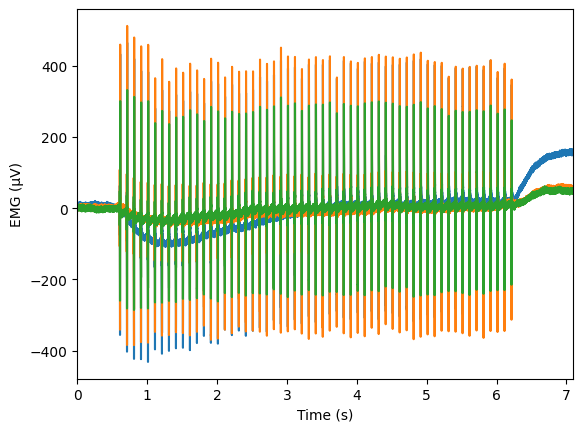

In [3]:
t = np.array(df_emg['time'])
emg_1 = eEMG(df_emg['raw 1'],t)
emg_2 = eEMG(df_emg['raw 2'],t)
emg_3 = eEMG(df_emg['raw 3'],t)

fig, ax = plt.subplots() 
emg_1.plot_raw(ax)
emg_2.plot_raw(ax)
emg_3.plot_raw(ax)

## Apply HPF to the data

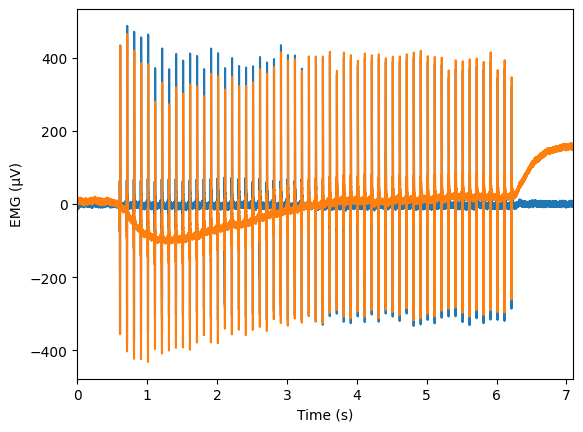

In [4]:
f_HPF = 5
o_HFP = 5
emg_1.HPF(f_HPF,o_HFP)

fig, ax = plt.subplots() 
emg_1.plot(ax)
emg_1.plot_raw(ax)


## Apply LFP

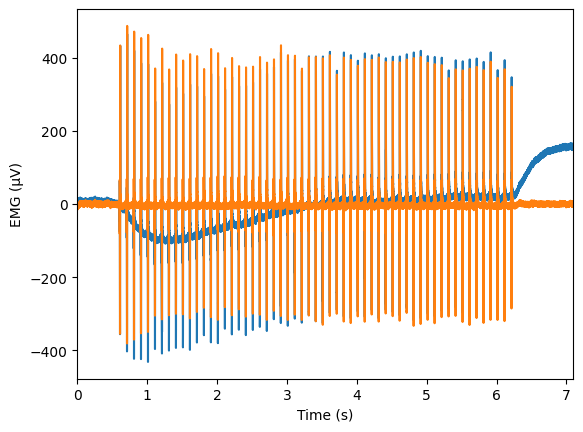

In [5]:
f_LPF = 10_000
o_LFP = 5
emg_1.LPF(f_LPF,o_LFP)

fig, ax = plt.subplots() 
emg_1.plot_raw(ax)
emg_1.plot(ax)


## Process Triggers

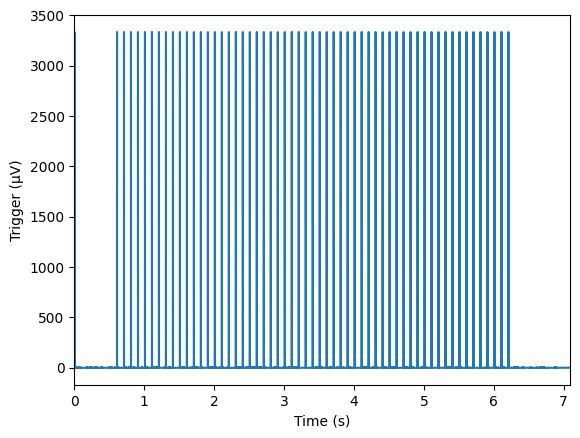

In [6]:
trigger = trigger(df_emg['Tr0 '],t)
fig, ax = plt.subplots() 
trigger.plot_raw(ax)

(1.0, 1.02)

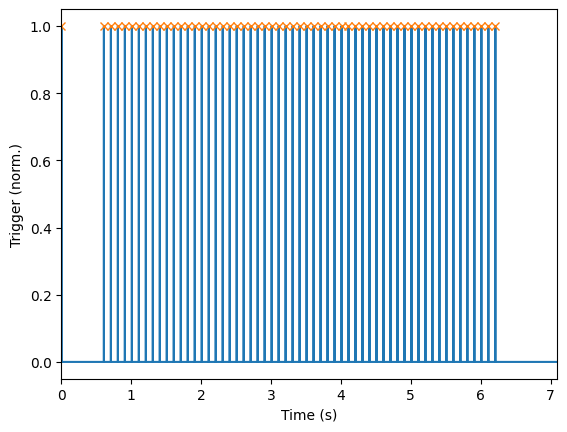

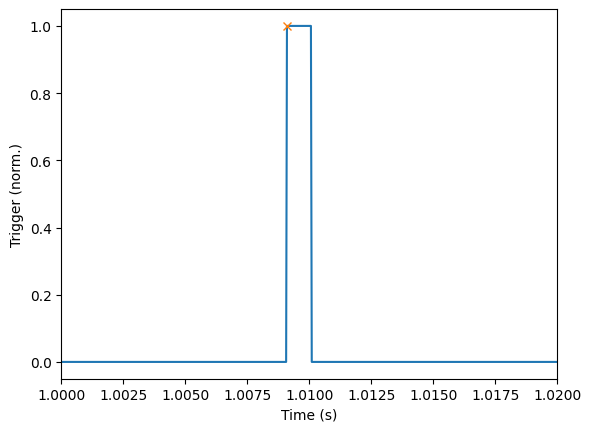

In [7]:

tr_start_idx, tr_start,_ = trigger.get_events()

fig, ax = plt.subplots() 
trigger.plot_normalized(ax)
ax.plot(t[tr_start_idx], tr_start, "x")

##zoom 
fig, ax = plt.subplots() 
trigger.plot_normalized(ax)
ax.plot(t[tr_start_idx], tr_start, "x")
ax.set_xlim(1,1.02)


## Get trigger period sample index

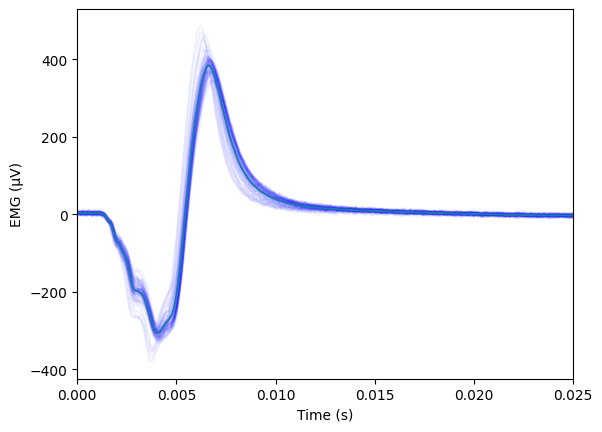

In [8]:

emg_1.trigger = trigger

emg_1.get_eCMAPS(0.025,0.0005)


fig, ax = plt.subplots() 


emg_1.plot_eCMAPS(ax,color = 'b', alpha = 0.05)
emg_1.plot_avg_eCMAP(ax)


## Get and plot average eCMAP characteristics 

Peak-to-Peak: 691.7µV
Vrms: 123.4µVrms
eCMAP duration: 8.2ms
eCMAP Latency: 1.8ms


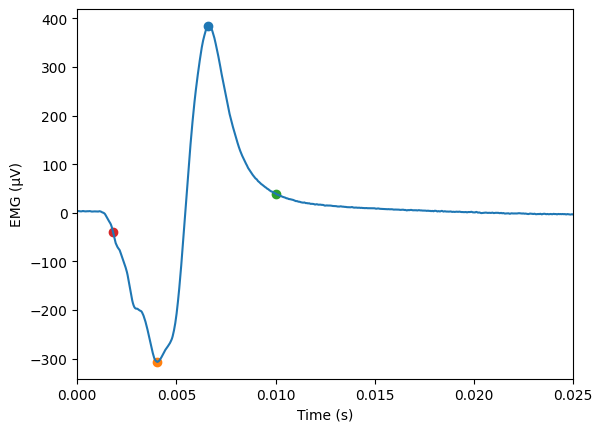

In [9]:
fig, ax = plt.subplots() 
emg_1.plot_avg_eCMAP(ax)

avg_eCMAP = emg_1.avg_eCMAP
ax.scatter(avg_eCMAP.ttmax,avg_eCMAP.max)
ax.scatter(avg_eCMAP.ttmin,avg_eCMAP.min)

ax.scatter(avg_eCMAP.tmax_10,avg_eCMAP.data[avg_eCMAP.tmax_10_idx])
ax.scatter(avg_eCMAP.tmin_10,avg_eCMAP.data[avg_eCMAP.tmin_10_idx])


print(f"Peak-to-Peak: {np.round(avg_eCMAP.peak2peak,1)}µV")
print(f"Vrms: {np.round(avg_eCMAP.rms,1)}µVrms")
print(f"eCMAP duration: {np.round(avg_eCMAP.duration*1000,1)}ms")
print(f"eCMAP Latency: {np.round(avg_eCMAP.latency*1000,1)}ms")